# Imports

In [1]:
import scanpy as sc

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib

import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# utils function -- helper functions for plotting
import sys
sys.path.append('../../utils/')
import figure_utils as figure_utils

In [2]:
# create figures directory
import os

directory_path = 'figures'
if not os.path.exists(directory_path):
    # If not, create the directory
    os.makedirs(directory_path)
    print(f"Directory '{directory_path}' created successfully.")
else:
    print(f"Directory '{directory_path}' already exists.")

Directory 'figures' created successfully.


# Plot aesthetics

In [3]:
%matplotlib inline
matplotlib.rcParams['figure.dpi'] = 500 # 150 dpi resolution
matplotlib.rcParams['image.cmap'] = 'Spectral_r' # preferred color map
# matplotlib.rcParams['figure.figsize'] = [6, 6] # Square
# no bounding boxes or axis:
matplotlib.rcParams['axes.spines.bottom'] = "off"
matplotlib.rcParams['axes.spines.top'] = "off"
matplotlib.rcParams['axes.spines.left'] = "off"
matplotlib.rcParams['axes.spines.right'] = "off"

In [4]:
# UMAP PARAMS
DOT_SIZE = 25
LEGEND_FONTSIZE = 8
LEGEND_FONTOUTLINE = 1
UMAP_FIGSIZE = (10,10)

# SEXES COLOR -- NEW
HERM_COLOR = '#ff8b00'
MALE_COLOR = '#2258a5'
SHARED_SEX_COLOR = '#349c55'

# Load Data

In [5]:
ad_url = "https://fh-pi-setty-m-eco-public.s3.us-west-2.amazonaws.com/worm-glia-atlas/GliaOnly.h5ad" 
adata = sc.read('../../data/GliaOnly.h5ad', backup_url=ad_url)
adata

AnnData object with n_obs × n_vars = 20810 × 12376
    obs: 'Celltype', 'sex_specificity', 'leiden_postBC', 'sex', 'SheathSocket_label', 'Compartments', 'leiden_preBC', 'cluster_sex_label', 'Cluster_Celltype'
    var: 'highly_variable', 'previous_highly_variable', 'transcription_factors', 'transporters', 'neuropeptides', 'gene_ids'
    uns: 'BatchCorrected_LeidenClusters_colors', 'Celltype_colors', 'Cluster_Celltype_colors', 'Compartments_colors', 'FiguresData_Sheath_Selection_Results', 'FiguresData_Socket_Selection_Results', 'SheathSocket_L2_GeneRanking_Order', 'SheathSocket_Probability_Estimates', 'SheathSocket_label_colors', 'Validations_colors', 'cluster_sex_label_colors', 'dendrogram_Cluster_Celltype', 'gene_validations', 'leiden_noBC_colors', 'leiden_postBC_colors', 'sex_colors', 'sex_frac_Glia_postBC', 'sex_specificity_colors'
    obsm: 'DM_EigenVectors_postBC', 'X_pca', 'X_pca_harmony', 'X_umap', 'X_umap_noBC'
    varm: 'cluster_means', 'pairwise_cluster_count'
    layers: 'mag

In [6]:
# set colors
adata.uns['sex_specificity_colors'] = [SHARED_SEX_COLOR, HERM_COLOR, MALE_COLOR]

# Figure 2A -- Identified Clusters & Celltypes with Batch Correction

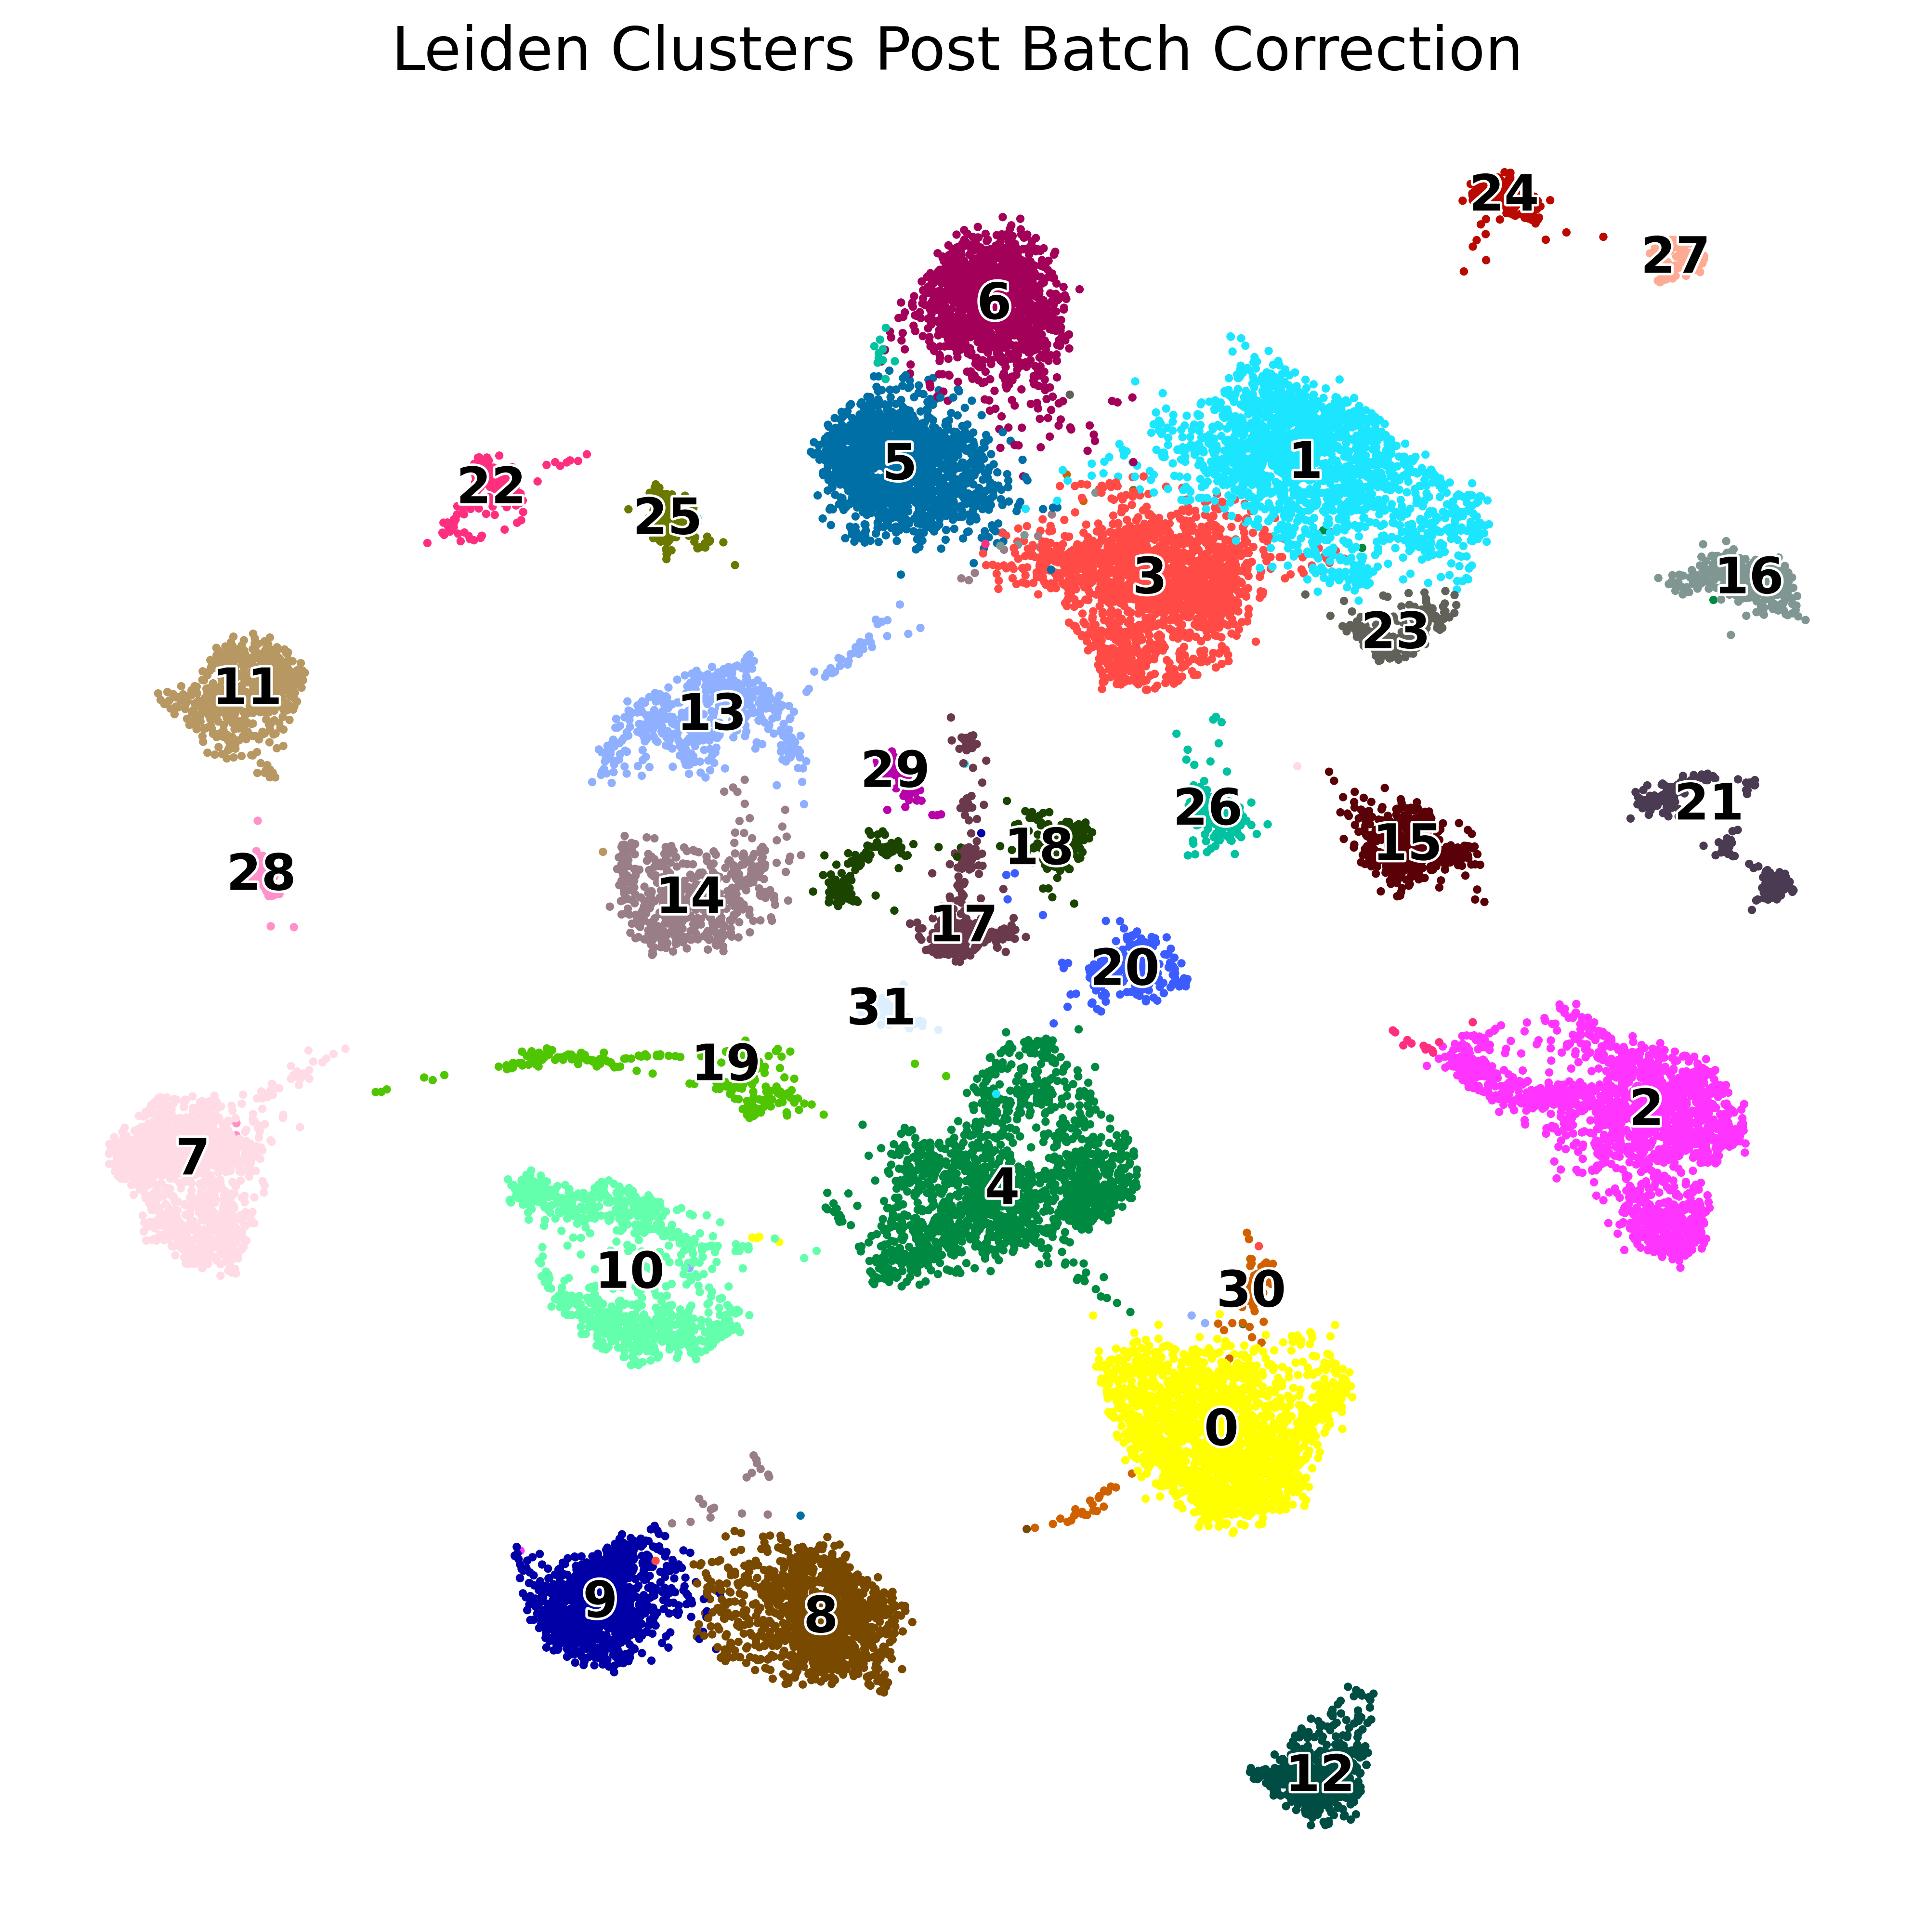

In [7]:
with matplotlib.pyplot.rc_context({'figure.figsize':UMAP_FIGSIZE,'font.size':15}):
    sc.pl.umap(
        adata,
        color=['leiden_postBC'],
        frameon=False,
        size=DOT_SIZE,
        title='Leiden Clusters Post Batch Correction',
        save='figure_2A_Clusters_with_Label.png',
        legend_loc='on data',
        legend_fontoutline=1.5,
    )

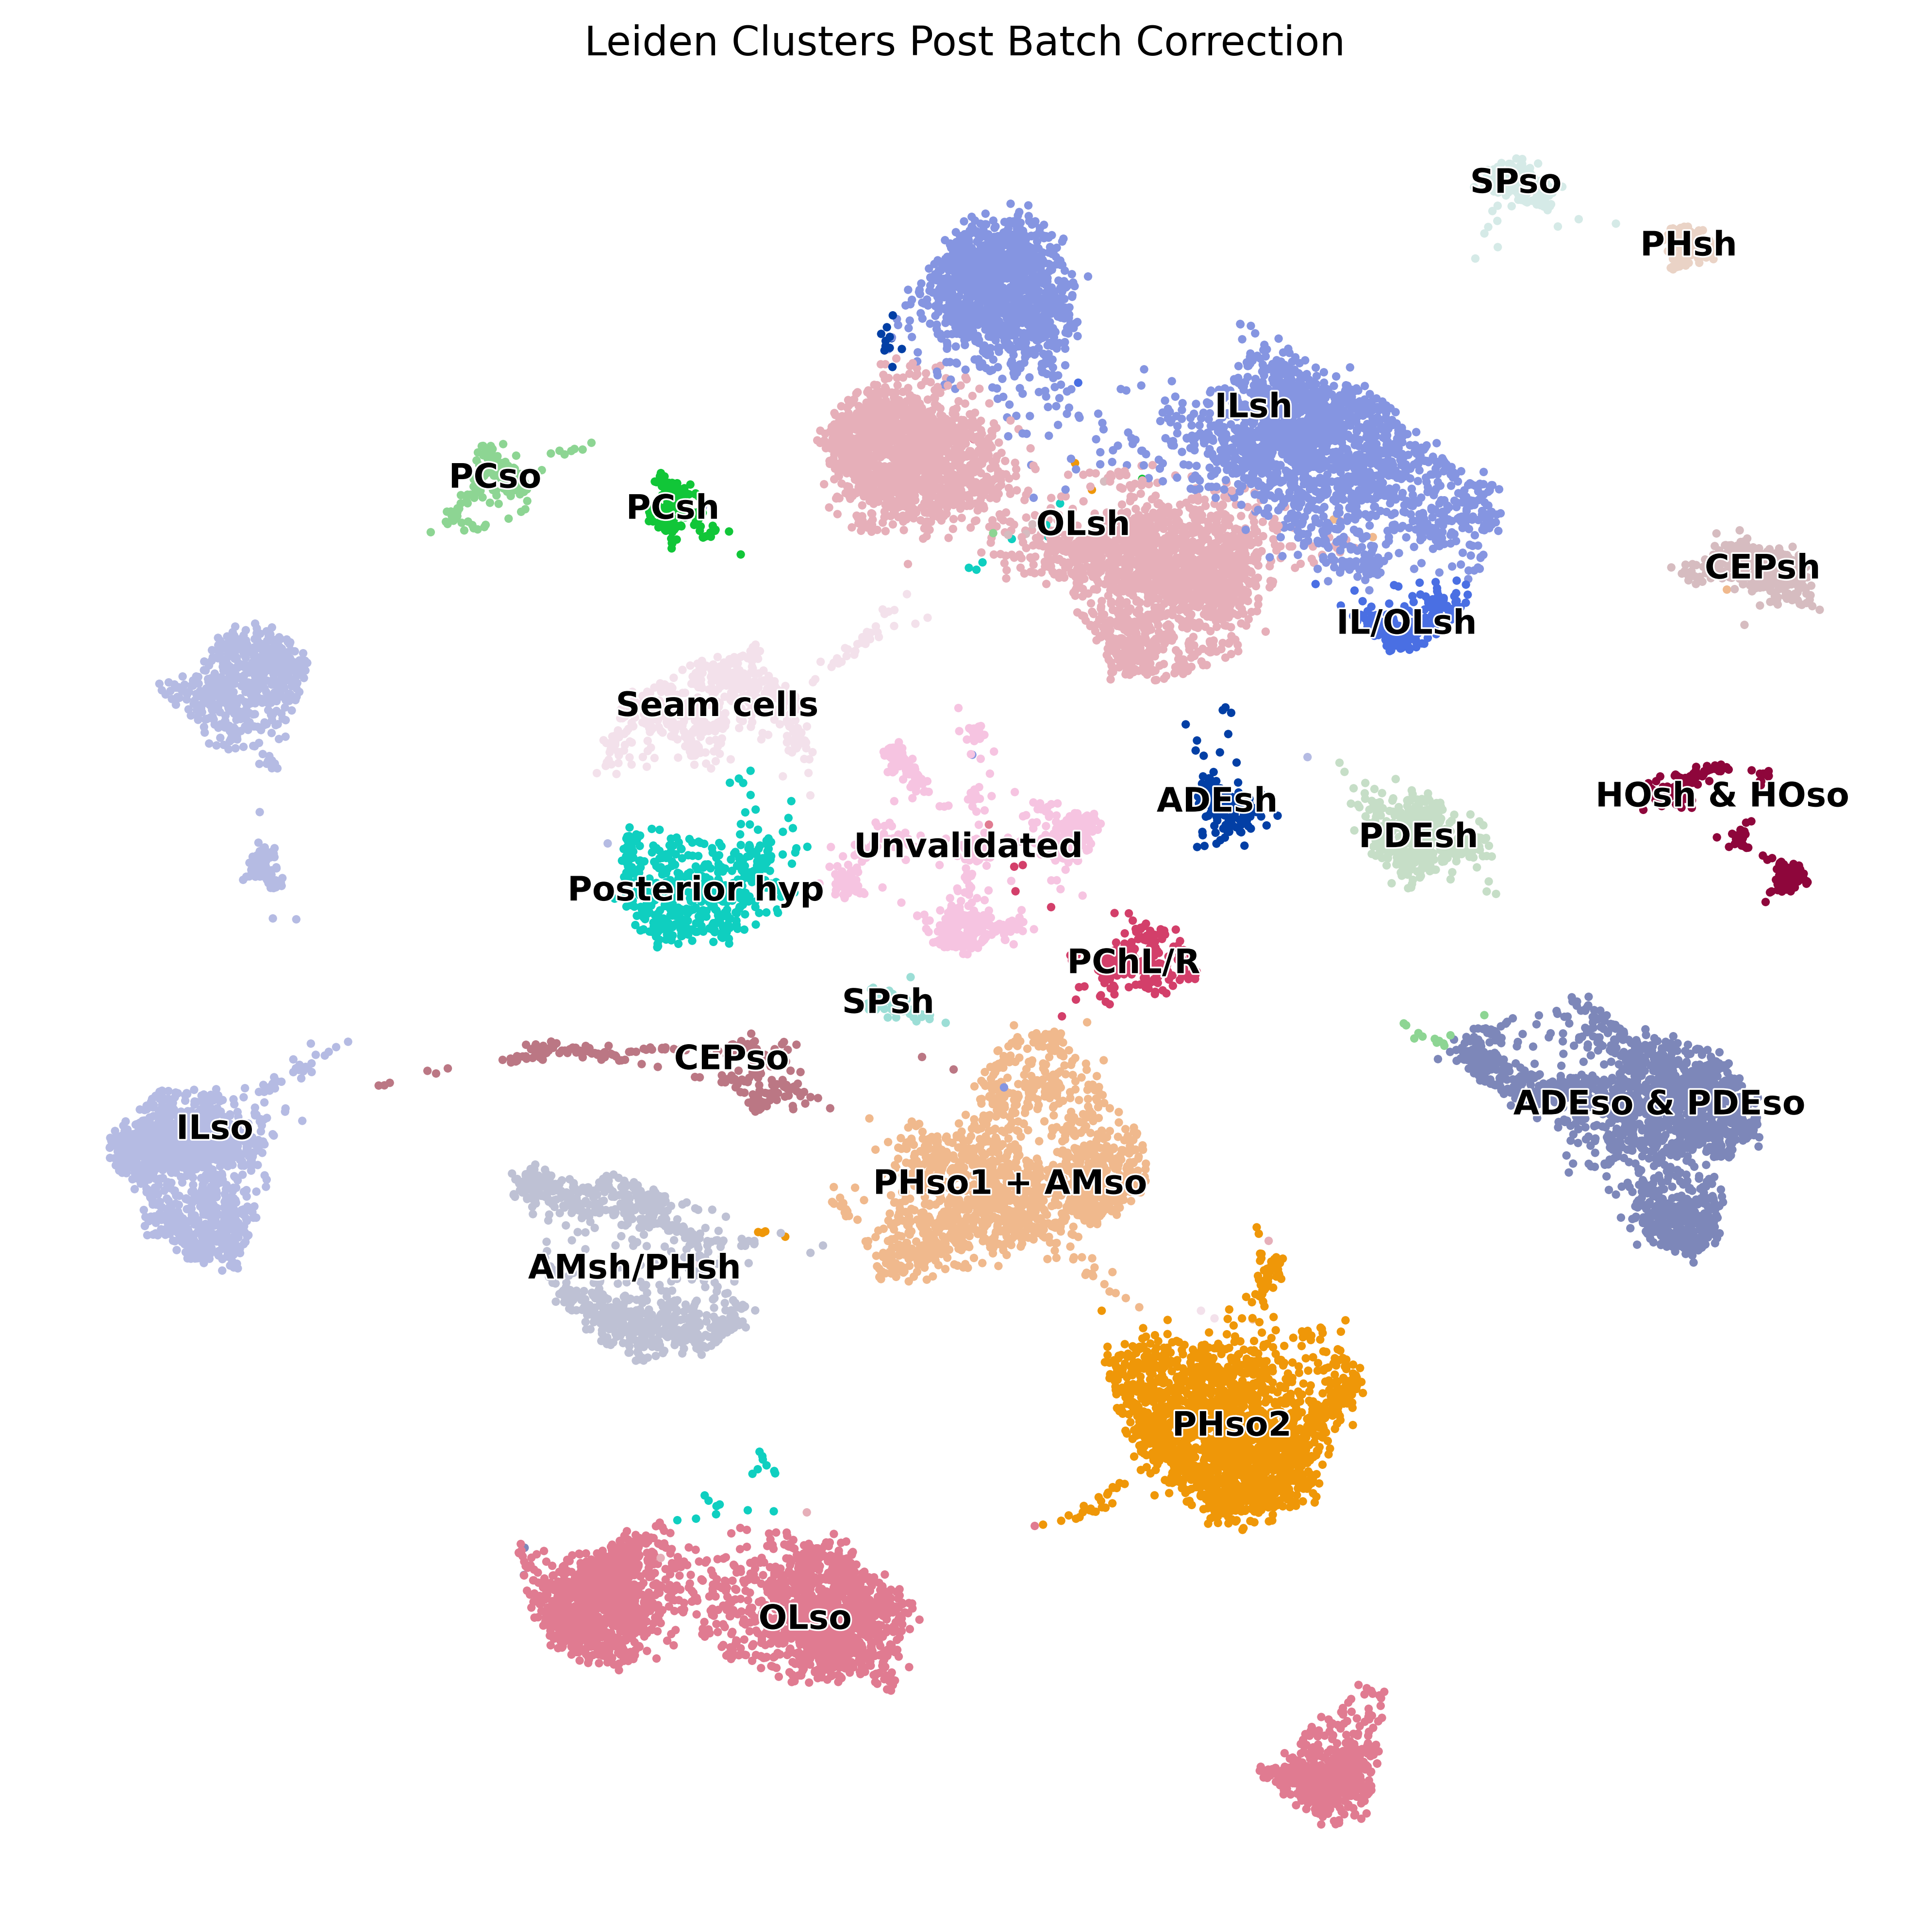

In [8]:
with matplotlib.pyplot.rc_context({'figure.figsize':UMAP_FIGSIZE}):
    sc.pl.umap(
        adata,
        color=['Celltype'],
        frameon=False,
        size=DOT_SIZE,
        title='Leiden Clusters Post Batch Correction',
        legend_loc='on data',
        legend_fontoutline=1,
        save='figure_2A_Celltypes.png',
        
    )

# Figure 2B -- Sex Specificity - Post Batch Corrected Data

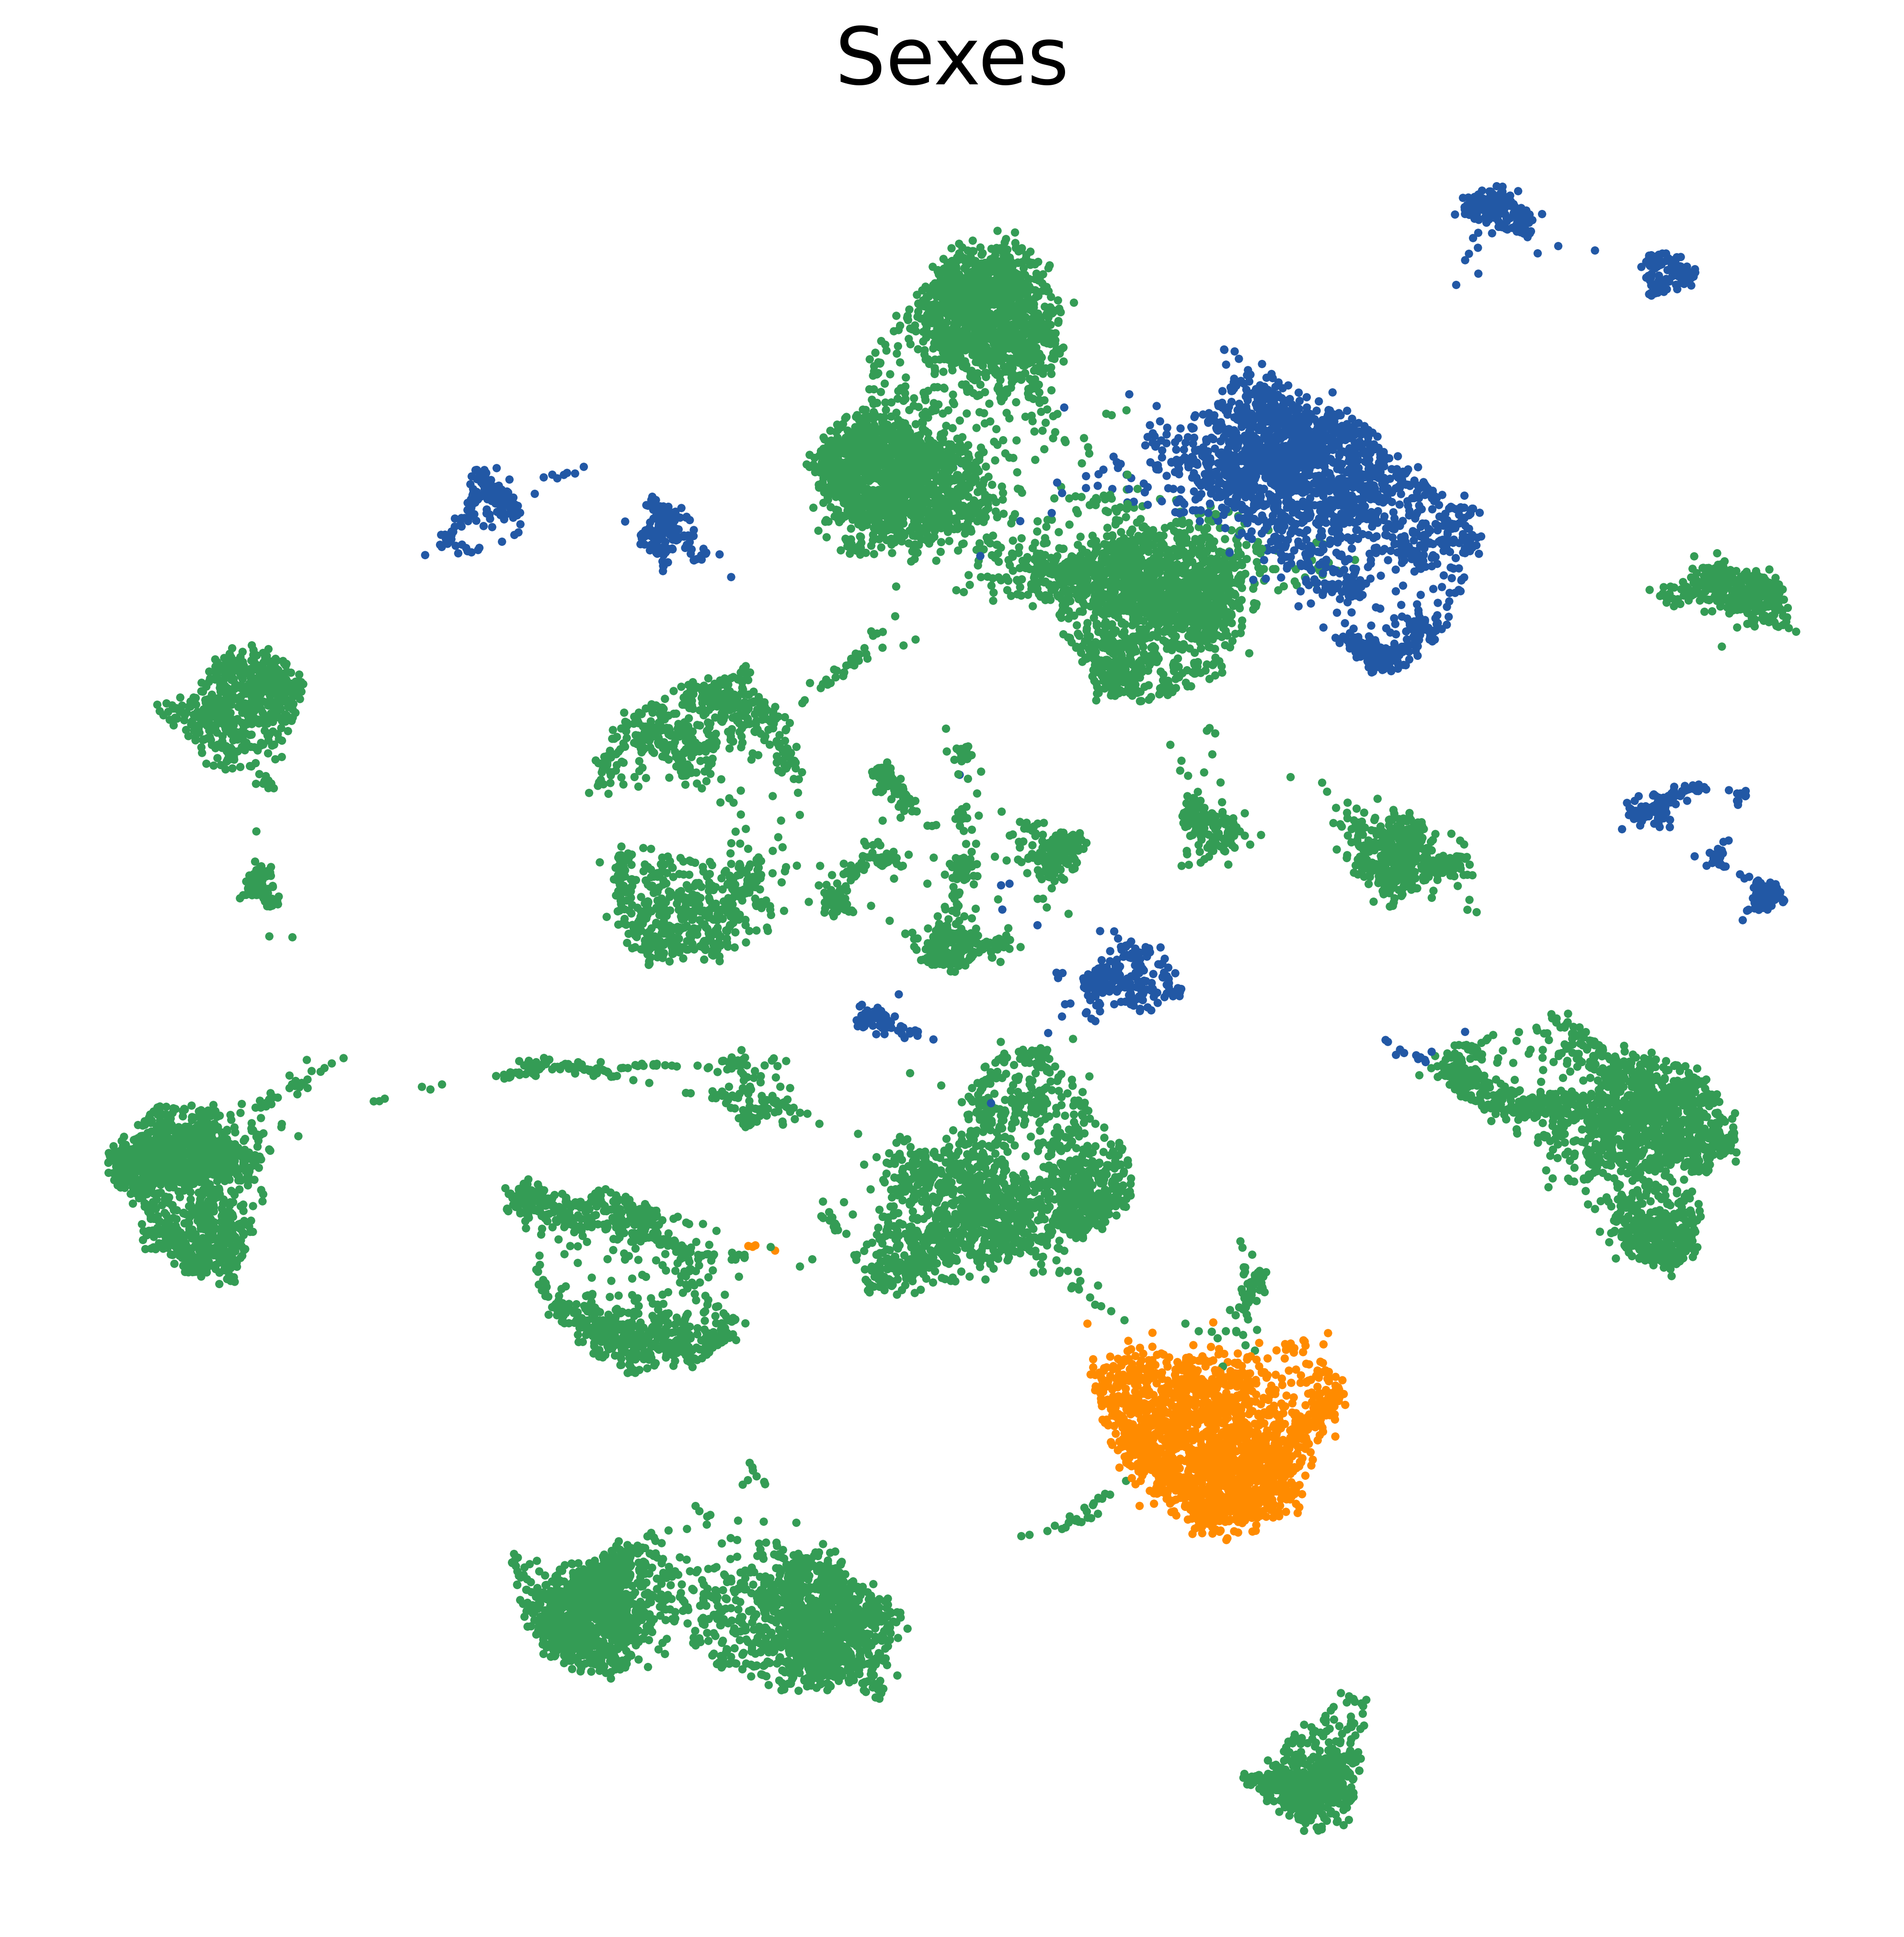

In [9]:
with matplotlib.pyplot.rc_context({'figure.figsize':UMAP_FIGSIZE, 'font.size': 20.0}):
    sc.pl.umap(
        adata,
        color=['sex_specificity'],
        frameon=False,
        size=DOT_SIZE,
        title='Sexes',
        save='figure_2B_sex_specificity.png',
        legend_loc=None
    )

# Figure 2C -- Pairwise Cluster 10

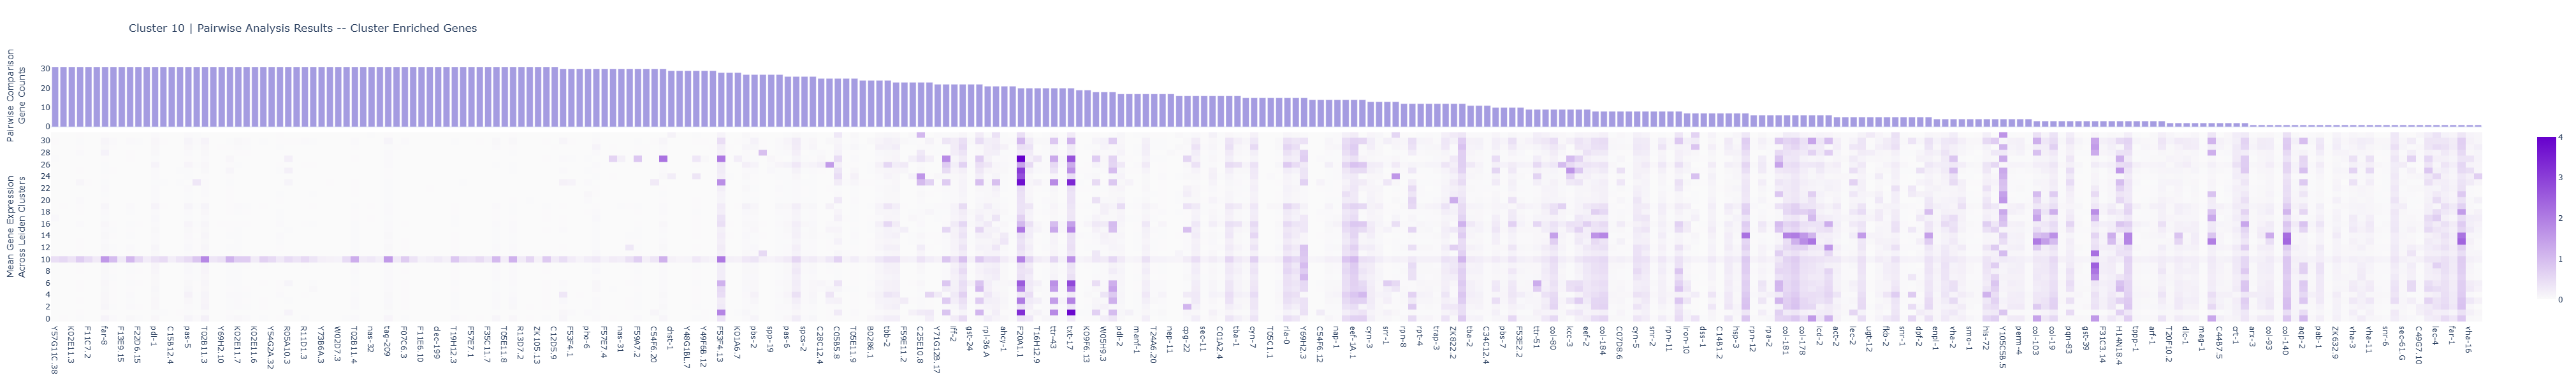

In [10]:
figure_utils.get_pairwise_results(ad_data=adata, cluster_id='10', filename=f'figures/pairwisefigure_2C_Cluster10')

# Figure 2D -- Cluster 10 Highlighted

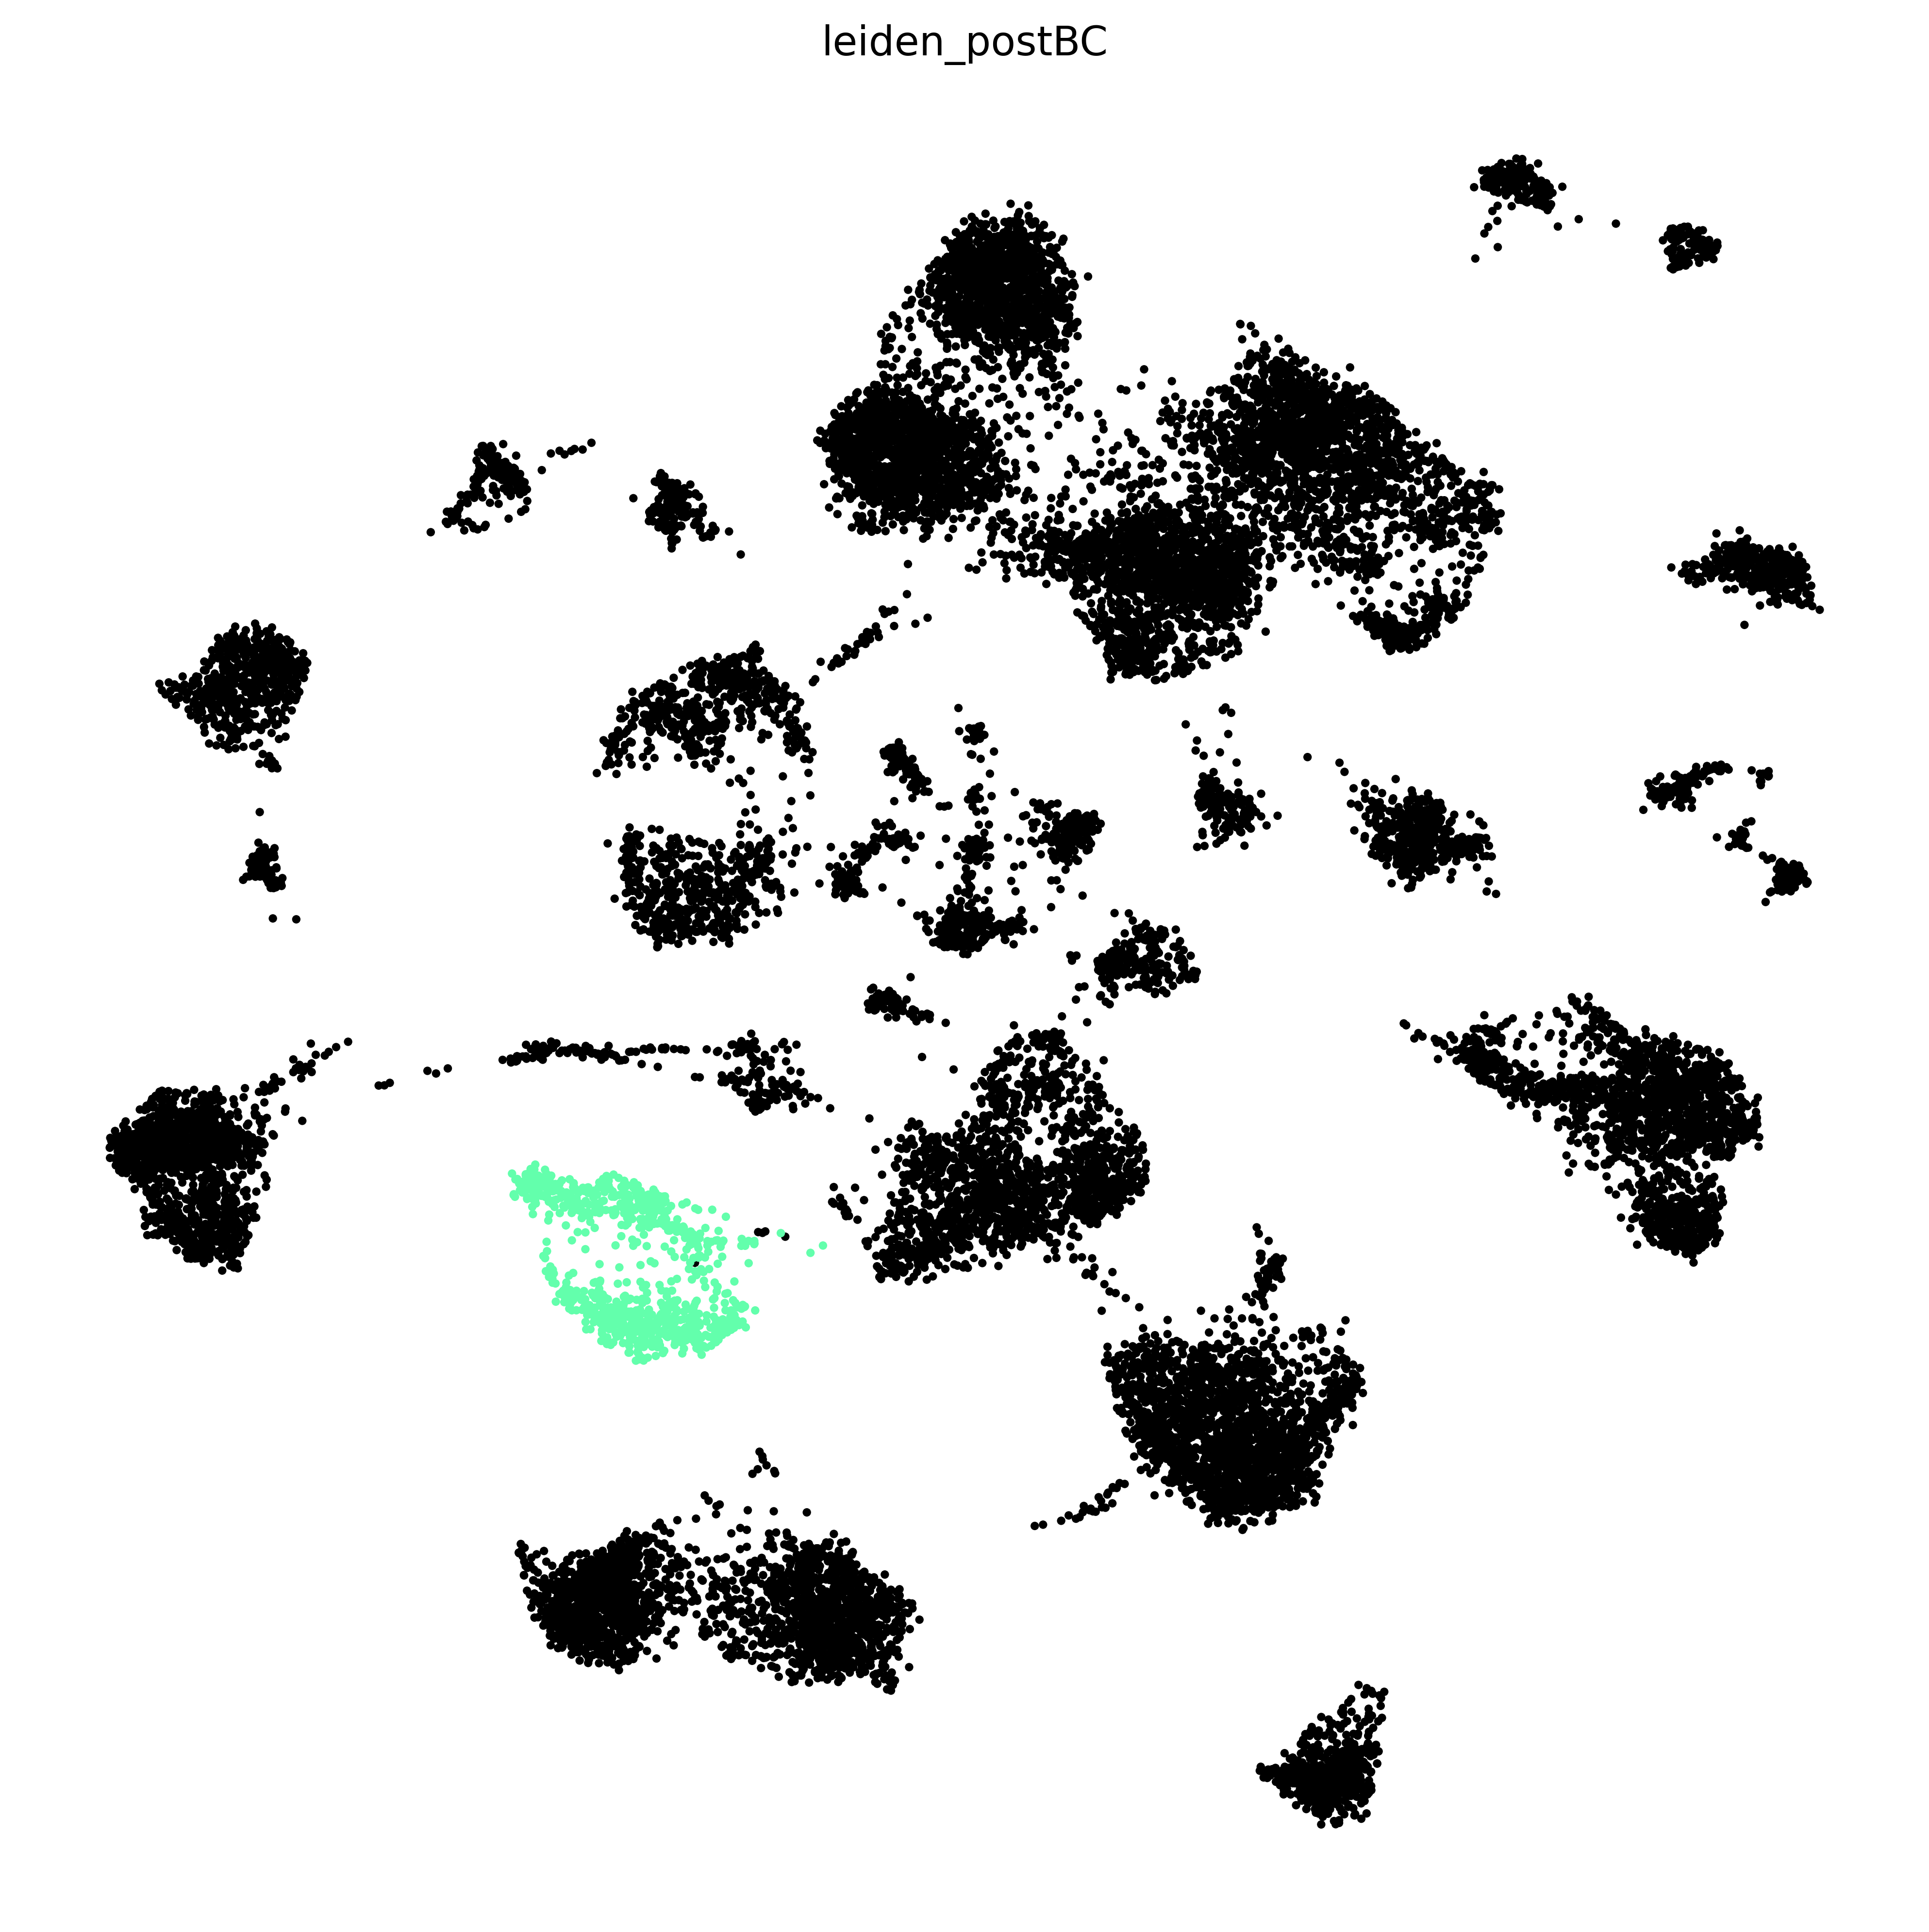

In [11]:
with matplotlib.pyplot.rc_context({'figure.figsize':UMAP_FIGSIZE}):
    sc.pl.umap(
        adata,
        color=['leiden_postBC'],
        groups=['10'],
        frameon=False,
        legend_loc=None,
        size=DOT_SIZE,
        na_color='#000000',
        save='figure_2D_Highlight_Cluster10.png',
    )